In [1]:
from langgraph.graph import StateGraph,START,END

In [2]:
from typing import List,Annotated,Dict,Tuple,Any,TypedDict

In [3]:
class BMIState(TypedDict):
    height: float
    weight : float
    bmi : float

In [4]:
def compute_bmi(state:BMIState) -> BMIState:

    height = state["height"]
    weight = state["weight"]

    bmi = weight/(height**2)

    state["bmi"] = bmi
    return state

In [5]:
graph= StateGraph(BMIState)

# Define graph structure
#ADD THE NODE
graph.add_node('calculate_bmi',compute_bmi)
#ADD THE EDGES
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi',END)


In [11]:
#compile the graph
workflow=graph.compile()

In [13]:
intial_state={"height":1.75,"weight":70}

In [12]:
workflow.invoke({"height":1.75,"weight":70})

{'height': 1.75, 'weight': 70, 'bmi': 22.857142857142858}

In [14]:
final_state=workflow.invoke({"height":1.75,"weight":70})

In [15]:
final_state

{'height': 1.75, 'weight': 70, 'bmi': 22.857142857142858}

In [19]:
from IPython.display import display,Image

In [16]:
workflow.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'calculate_bmi': Node(id='calculate_bmi', name='calculate_bmi', data=calculate_bmi(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='calculate_bmi', data=None, conditional=False), Edge(source='calculate_bmi', target='__end__', data=None, conditional=False)])

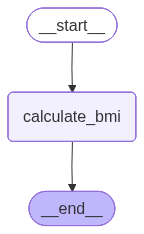

In [20]:
Image(workflow.get_graph().draw_mermaid_png())